In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
data = pd.read_excel("/kaggle/input/project/Match Winner.xlsx")

NameError: name 'pd' is not defined

In [2]:
data = pd.read_excel("/kaggle/input/project/Match Winner.xlsx")

NameError: name 'pd' is not defined

In [4]:
import pandas as pd

In [5]:
data = pd.read_excel("/kaggle/input/project/Match Winner.xlsx")

In [6]:
data.head()

,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,4,0,H,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,4,2,H,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,1,3,NH,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,2,2,NH,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,2,0,H,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [13]:
data = data.drop(columns=['FTHG', 'FTAG'], errors='ignore')


In [14]:
data.head()

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTWinStreak3,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,H,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,H,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,NH,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,NH,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,H,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [17]:
import pandas as pd

def remove_outliers_iqr(data):
    # Select only numeric columns
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    
    # Make a copy to avoid updating original data
    data_clean = data.copy()

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows within bounds
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]

    return data_clean


===== FIRST 5 ROWS =====


,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTWinStreak3,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,H,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,H,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,NH,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,NH,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,H,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0



===== SHAPE =====
(6686, 21)

===== DATA TYPES =====
FTR               object
HTGS               int64
ATGS               int64
HTGC               int64
ATGC               int64
HTP              float64
ATP              float64
HTFormPts          int64
ATFormPts          int64
HTWinStreak3       int64
HTWinStreak5       int64
HTLossStreak3      int64
HTLossStreak5      int64
ATWinStreak3       int64
ATWinStreak5       int64
ATLossStreak3      int64
ATLossStreak5      int64
HTGD             float64
ATGD             float64
DiffPts          float64
DiffFormPts      float64
dtype: object

===== SUMMARY STATISTICS =====


,count,mean,std,min,25%,50%,75%,max
HTGS,6686.0,24.978612,16.966772,0.000000,11.000000,23.000000,35.000000,102.000000
ATGS,6686.0,25.078672,16.920106,0.000000,12.000000,23.000000,36.000000,105.000000
HTGC,6686.0,25.062070,16.157505,0.000000,12.000000,23.000000,37.000000,85.000000
ATGC,6686.0,24.907867,16.101219,0.000000,12.000000,23.000000,36.000000,82.000000
HTP,6686.0,1.236413,0.503549,0.000000,0.906250,1.187500,1.571429,2.736842
ATP,6686.0,1.254950,0.494673,0.000000,0.928571,1.200000,1.571429,2.761905
HTFormPts,6686.0,6.385582,3.495739,0.000000,4.000000,6.000000,9.000000,15.000000
ATFormPts,6686.0,6.561173,3.453040,0.000000,4.000000,6.000000,9.000000,15.000000
HTWinStreak3,6686.0,0.063715,0.244263,0.000000,0.000000,0.000000,0.000000,1.000000
HTWinStreak5,6686.0,0.018397,0.134391,0.000000,0.000000,0.000000,0.000000,1.000000



===== MISSING VALUES =====
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


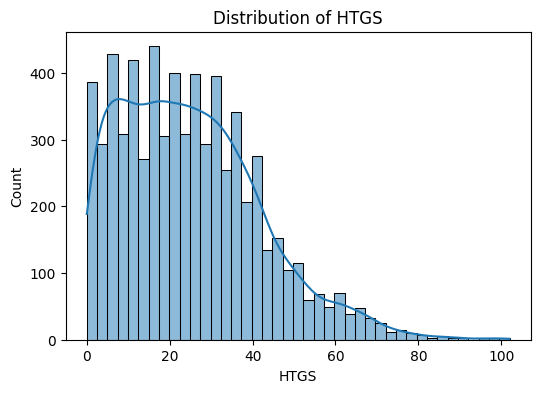

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


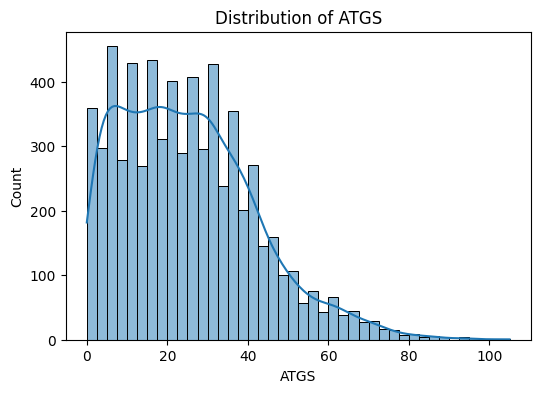

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


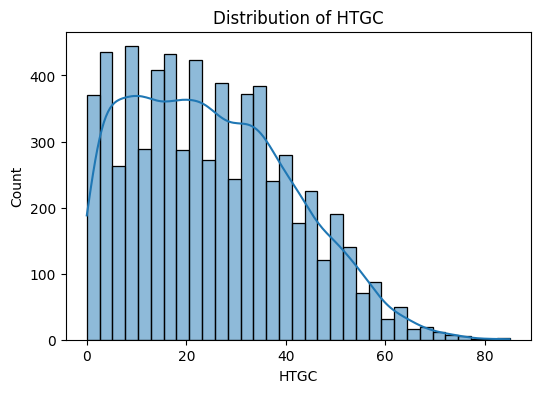

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


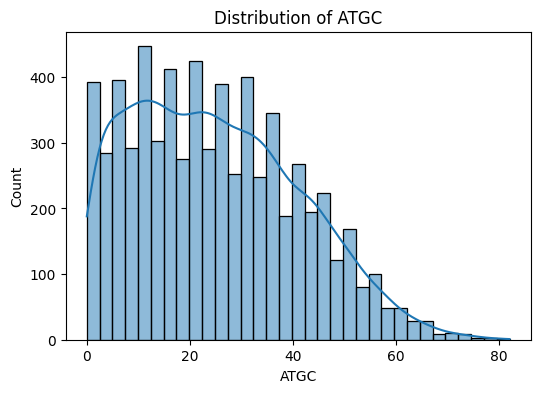

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


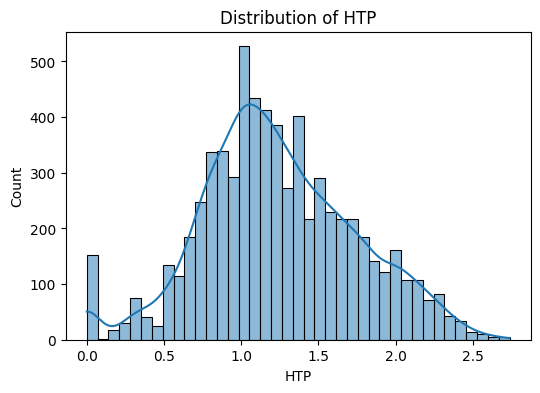

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


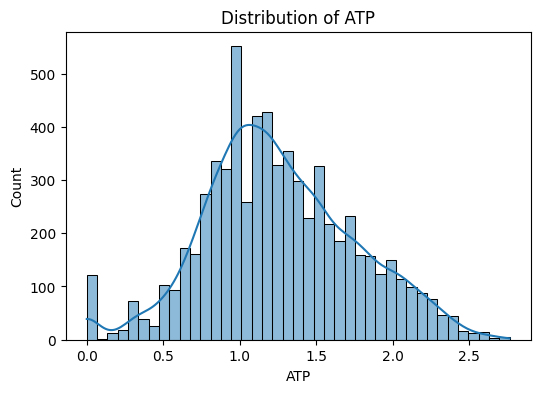

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


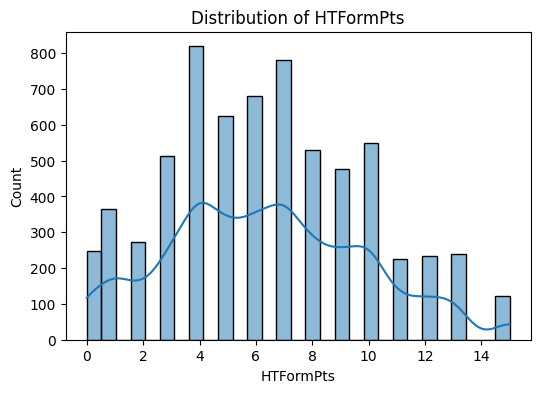

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


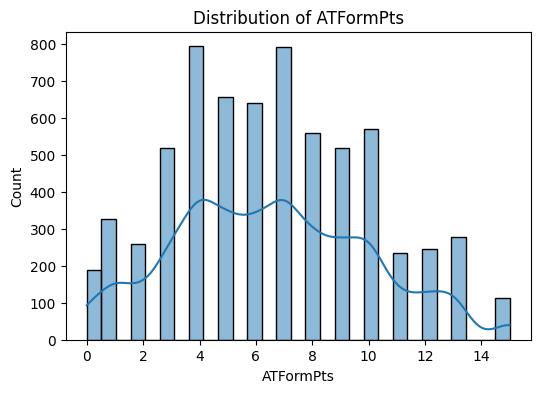

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


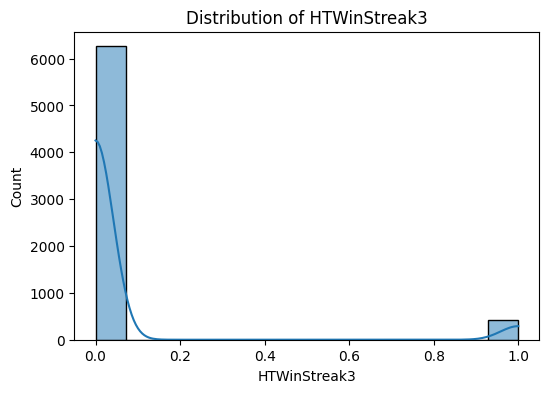

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


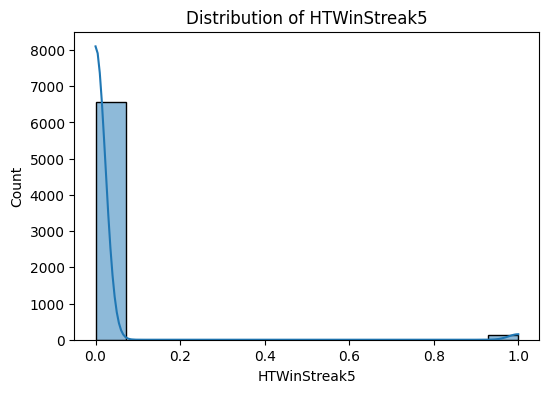

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


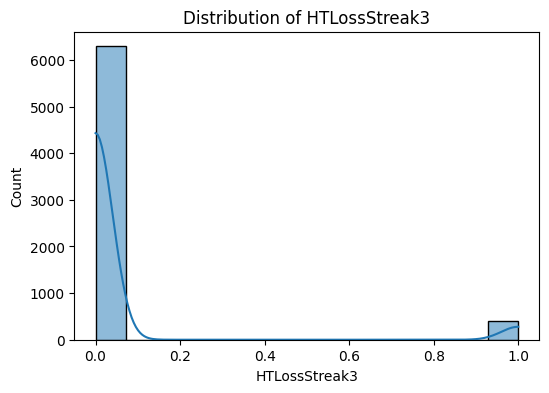

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


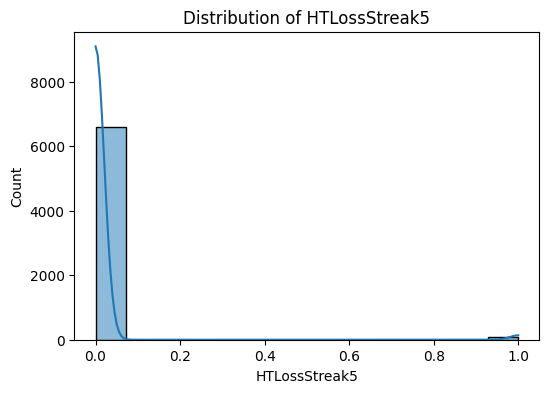

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


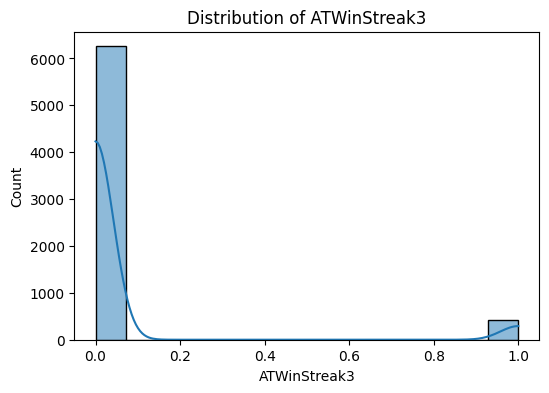

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


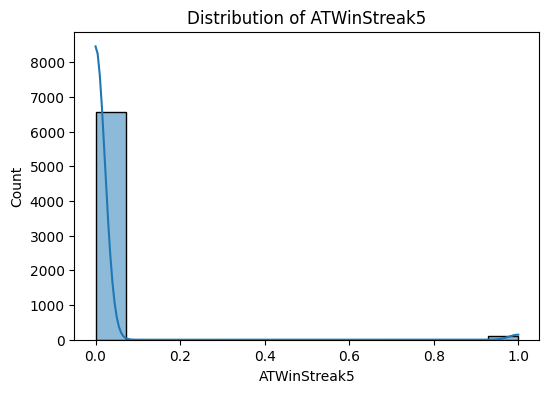

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


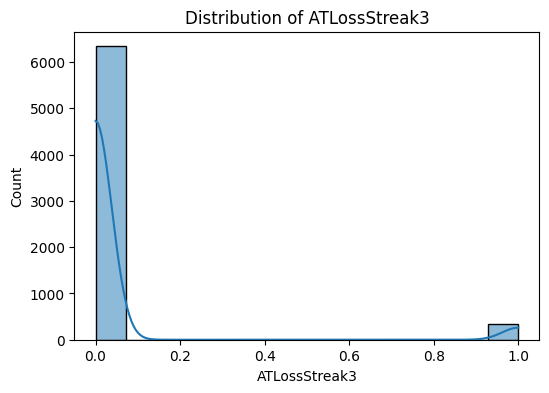

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


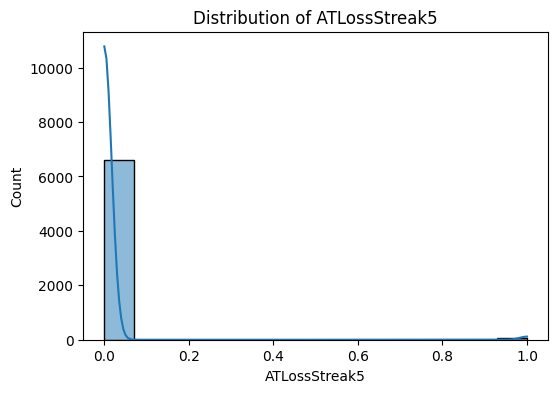

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


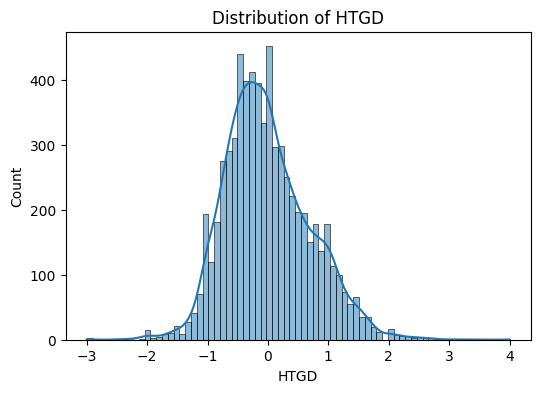

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


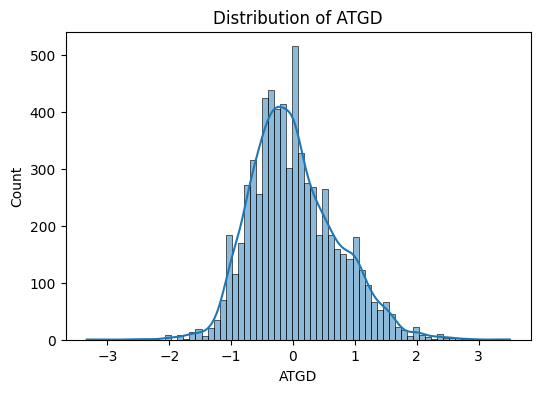

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


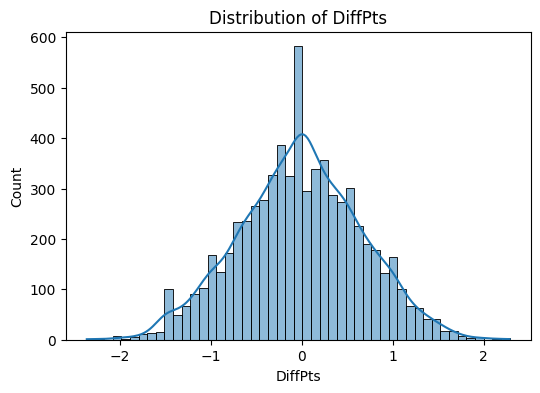

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


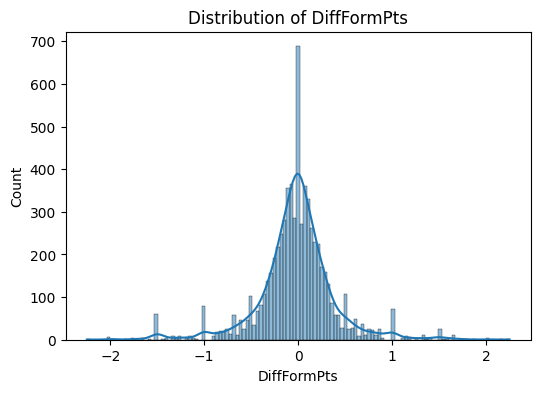

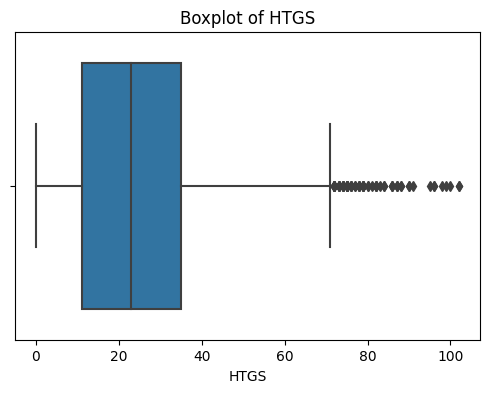

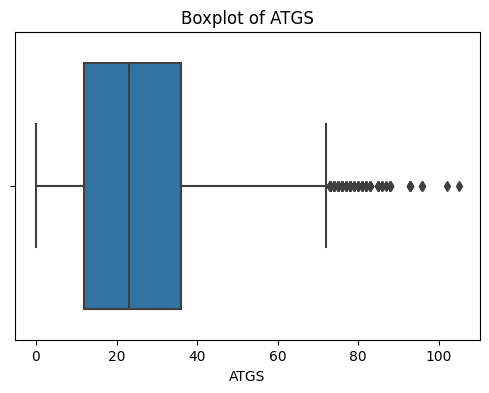

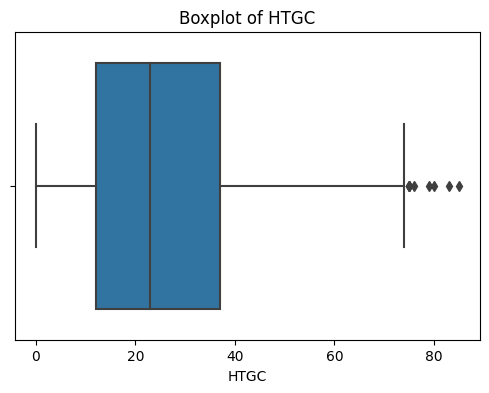

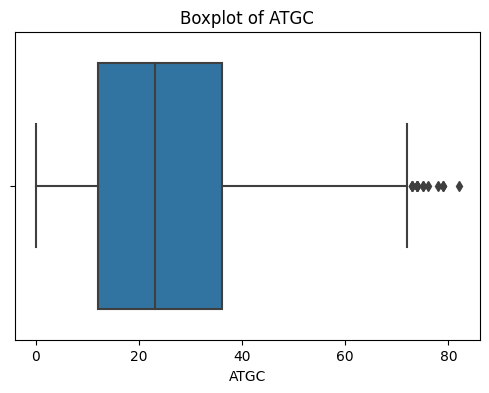

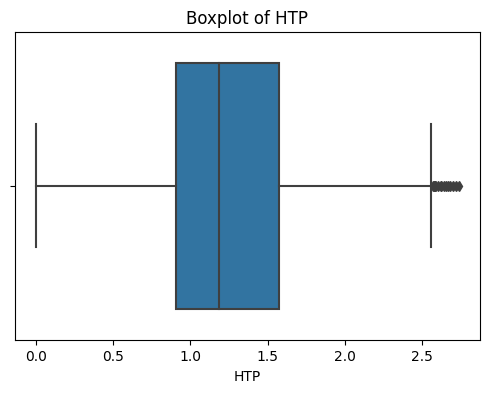

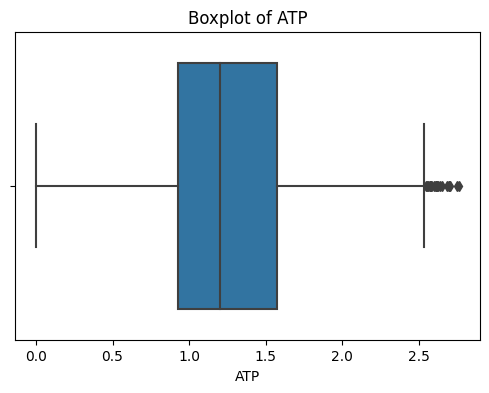

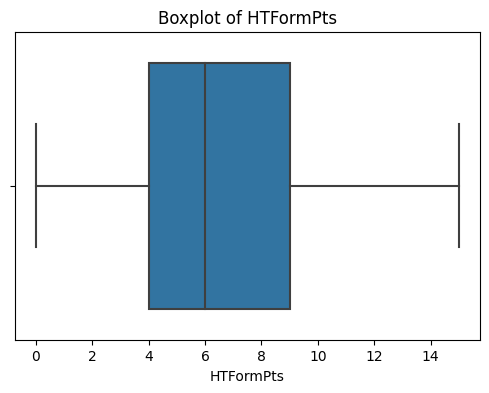

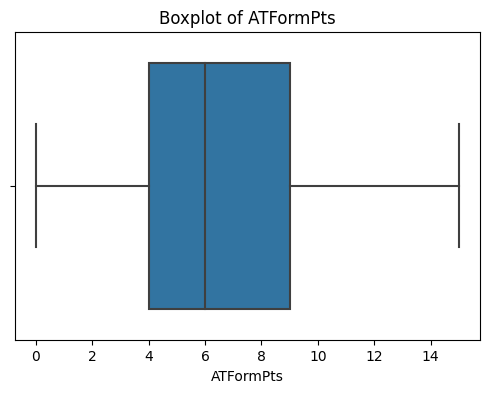

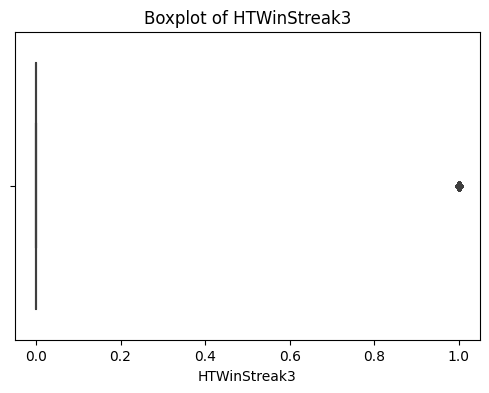

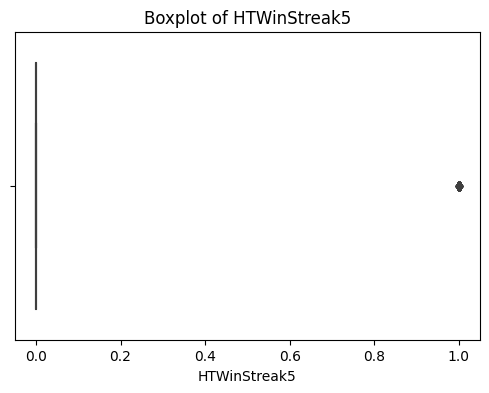

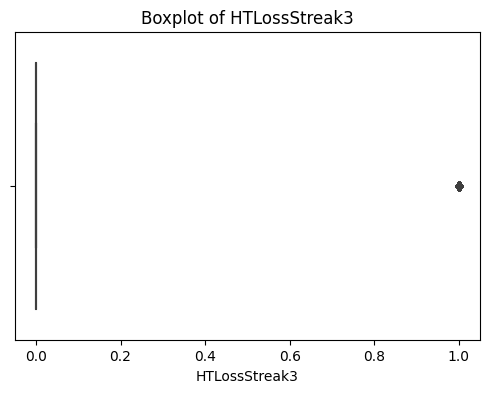

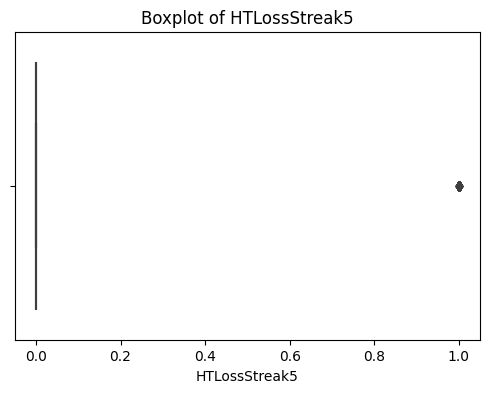

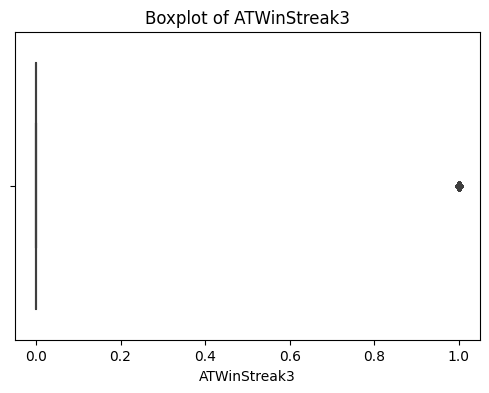

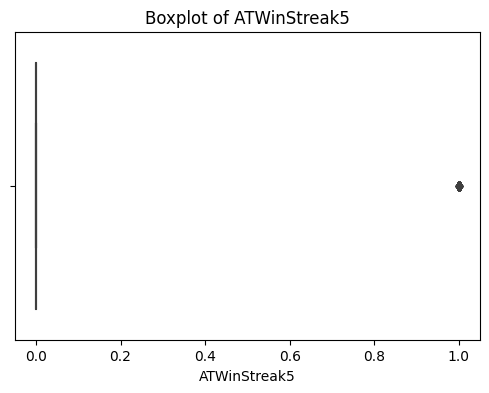

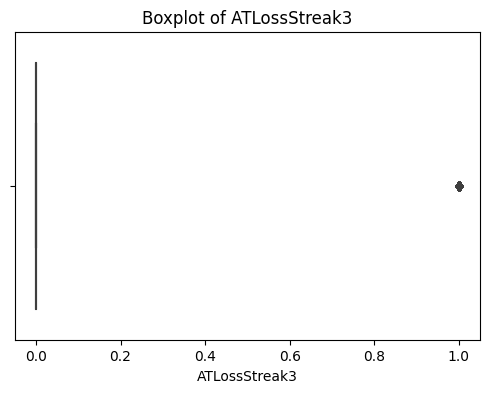

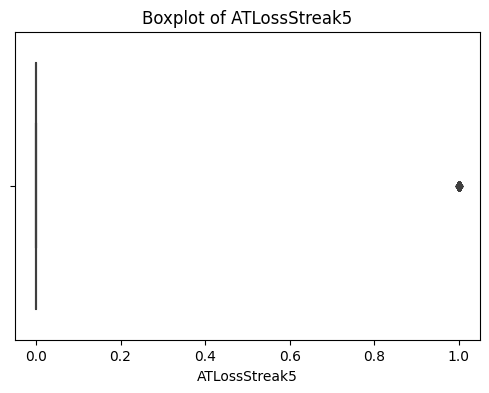

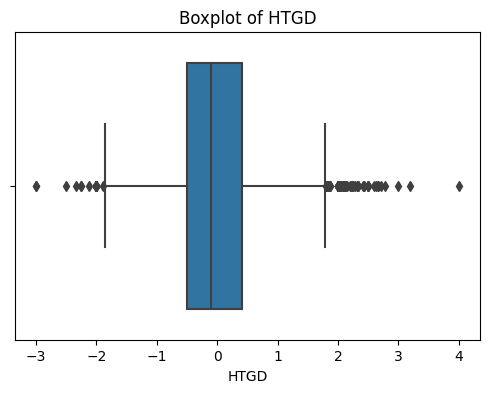

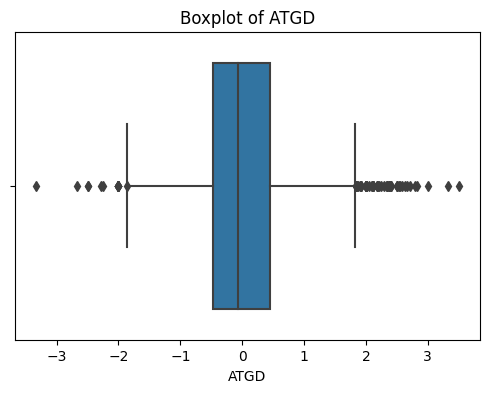

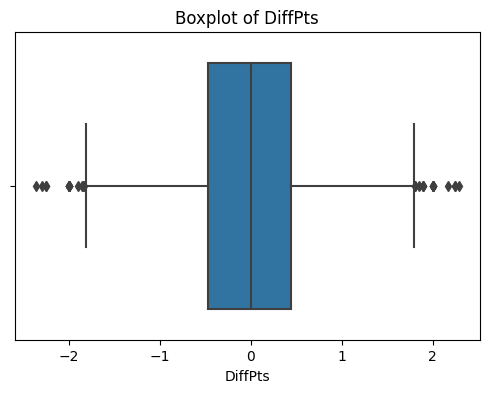

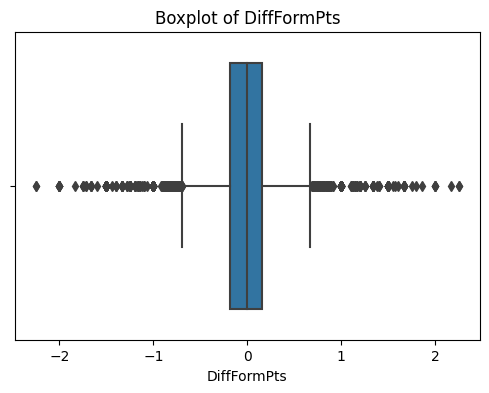

ValueError: could not convert string to float: 'H'

<Figure size 1200x800 with 0 Axes>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Basic EDA Functions
# -----------------------------

def basic_eda(data):
    print("===== FIRST 5 ROWS =====")
    display(data.head())

    print("\n===== SHAPE =====")
    print(data.shape)

    print("\n===== DATA TYPES =====")
    print(data.dtypes)

    print("\n===== SUMMARY STATISTICS =====")
    display(data.describe().T)

    print("\n===== MISSING VALUES =====")
    print(data.isnull().sum())


# -----------------------------
# 2. Distribution Plots
# -----------------------------

def plots_numeric(data):
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(data[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()


# -----------------------------
# 3. Boxplots (Outlier Visualization)
# -----------------------------

def boxplots(data):
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=data[col])
        plt.title(f"Boxplot of {col}")
        plt.show()


# -----------------------------
# 4. Correlation Heatmap
# -----------------------------

def correlation_heatmap(data):
    plt.figure(figsize=(12,8))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


# -----------------------------
# 5. Run EDA on your data
# -----------------------------

basic_eda(data)
plots_numeric(data)
boxplots(data)
correlation_heatmap(data)


Label Mapping: {'H': 0, 'NH': 1}

===== MODEL RESULTS =====
Accuracy : 0.6337817638266069
ROC-AUC  : 0.667762457857775


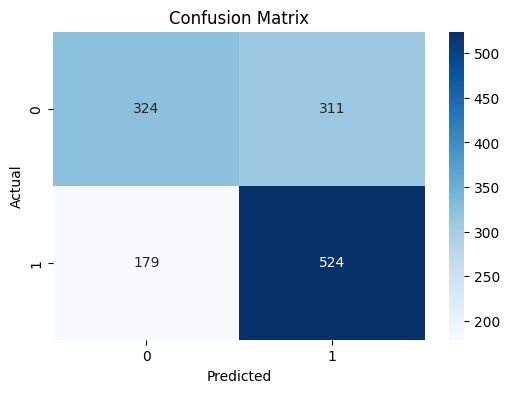

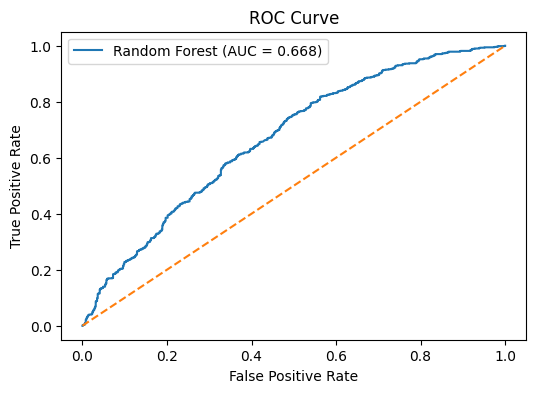


===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       635
           1       0.63      0.75      0.68       703

    accuracy                           0.63      1338
   macro avg       0.64      0.63      0.63      1338
weighted avg       0.64      0.63      0.63      1338



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1. Encode Target Column (FTR)
# ------------------------------
data_encoded = data.copy()

label = LabelEncoder()
data_encoded['FTR'] = label.fit_transform(data_encoded['FTR'])
# Example mapping: {'H':0, 'NH':1} OR reverse depending on alphabet order
print("Label Mapping:", dict(zip(label.classes_, label.transform(label.classes_))))

# ------------------------------
# 2. Define X and y
# ------------------------------
X = data_encoded.drop(columns=['FTR'])
y = data_encoded['FTR']

# ------------------------------
# 3. Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 4. Random Forest Classifier
# ------------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf.fit(X_train, y_train)

# ------------------------------
# 5. Predictions
# ------------------------------
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # probability of class "1"

# ------------------------------
# 6. Evaluation Metrics
# ------------------------------
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n===== MODEL RESULTS =====")
print("Accuracy :", accuracy)
print("ROC-AUC  :", roc_auc)

# ------------------------------
# 7. Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# 8. ROC Curve
# ------------------------------
fpr, tpr, th = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ------------------------------
# 9. Classification Report
# ------------------------------
print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_pred))
